In [1]:
#Importing the necassary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import xgboost as xgb
pal = sns.color_palette()

In [2]:
#Importing the datasets into a DataFrame
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
train_df.shape

(4209, 378)

In [4]:
test_df.shape

(4209, 377)

In [5]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
#Checking for numerical and categorical Columns in train and test dataset
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby('Column Type').count().reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


In [8]:
dtype_df = test_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby('Column Type').count().reset_index()

,Column Type,Count
0,int64,369
1,object,8


#### Drop zero variance columns as they dont add any value while applying ml model

var_df=pd.DataFrame(train_df.var(),columns=['Variance'])
zero_var_cols=list(var_df[var_df.Variance==0].index)
train_df.drop(columns=zero_var_cols,axis=1,inplace=True)
train_df.shape

Splitting the columns into constant , binary and cat features.

In [9]:
#Seggregating the columsn based on type to make analysis easier
#train dataset
counts = [[],[],[]]
cols = train_df.columns[2:].to_list()

for c in cols:
    typ=train_df[c].dtype
    uniq_cnt=len(np.unique(train_df[c]))
    if uniq_cnt == 1 :
        counts[0].append(c)
    elif uniq_cnt == 2 and typ==np.int64 :
        counts[1].append(c)
    else:
        counts[2].append(c)

In [10]:
print(' Constant features: {} \n Binary features: {} \n Categorical features: {}\n'.format(*[len(c) for c in counts]))

 Constant features: 12 
 Binary features: 356 
 Categorical features: 8



In [11]:
#test dataset
counts_test = [[],[],[]]
cols = test_df.columns[1:].to_list()

for c in cols:
    typ=test_df[c].dtype
    uniq_cnt=len(np.unique(test_df[c]))
    if uniq_cnt == 1 :
        counts_test[0].append(c)
    elif uniq_cnt == 2 and typ==np.int64 :
        counts_test[1].append(c)
    else:
        counts_test[2].append(c)

In [12]:
print(' Constant features: {} \n Binary features: {} \n Categorical features: {}\n'.format(*[len(c) for c in counts_test]))

 Constant features: 5 
 Binary features: 363 
 Categorical features: 8



In [13]:
# Check uniques values of the binary features :
uniq_dict = {}
for c in  counts[1]:
    uniq=str(np.sort(train_df[c].unique().tolist()))
    tlist = uniq_dict.get(uniq,[])
    tlist.append(c)
    uniq_dict[uniq] = tlist[:]

In [14]:
for unique_val, columns in uniq_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("--------------------------------------------------") 

Columns containing the unique values :  [0 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145',

We can conclude that there are only binary values ( 0 and 1) for the above columns

In [15]:
# Check for null values in the dataset
# train
is_na_df=pd.DataFrame(train_df.isna().any(),columns=['IsNACol'])
is_null_df=pd.DataFrame(train_df.isnull().any(),columns=['IsNullCol'])
is_na_df[is_na_df['IsNACol']==True]

,IsNACol


In [16]:
is_null_df[is_null_df['IsNullCol']==True]

,IsNullCol


In [17]:
# test
is_na_df=pd.DataFrame(test_df.isna().any(),columns=['IsNACol'])
is_null_df=pd.DataFrame(test_df.isnull().any(),columns=['IsNullCol'])
is_na_df[is_na_df['IsNACol']==True]

,IsNACol


In [18]:
is_null_df[is_null_df['IsNullCol']==True]

,IsNullCol


 There are no columns having NaN or Null values

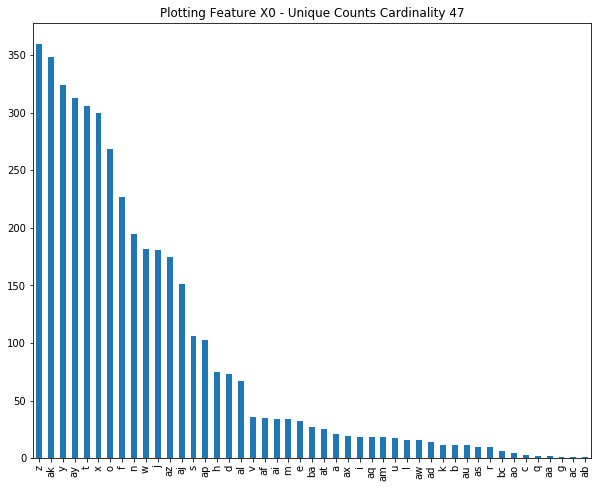

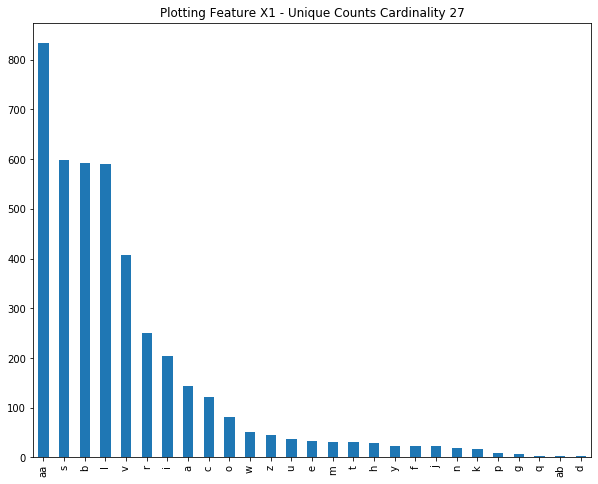

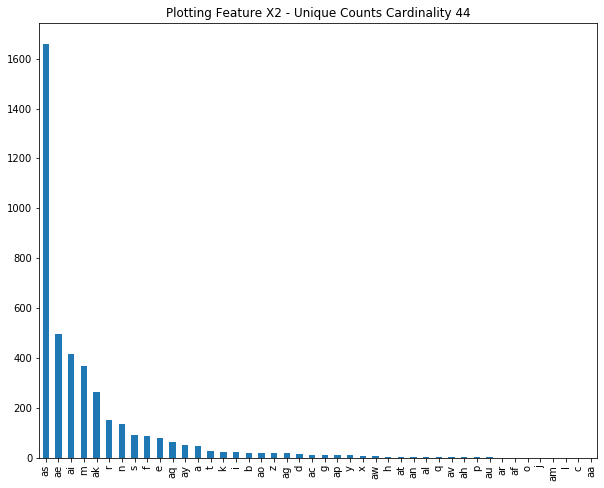

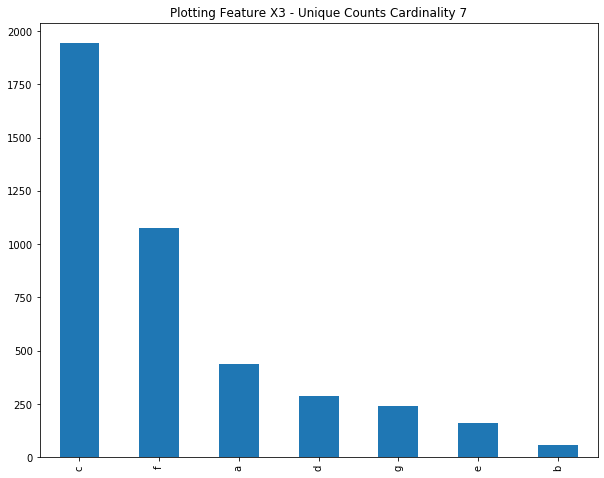

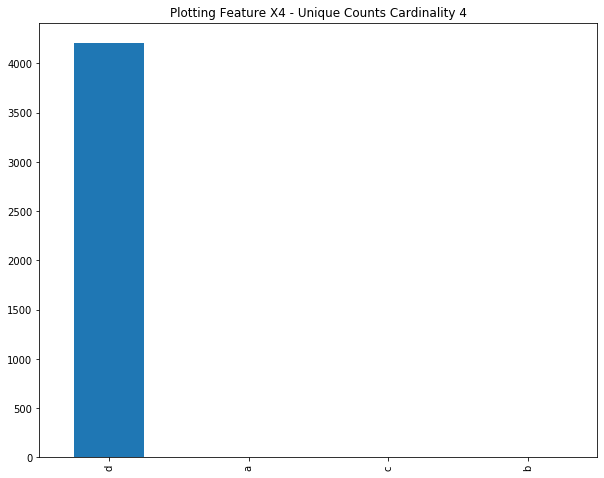

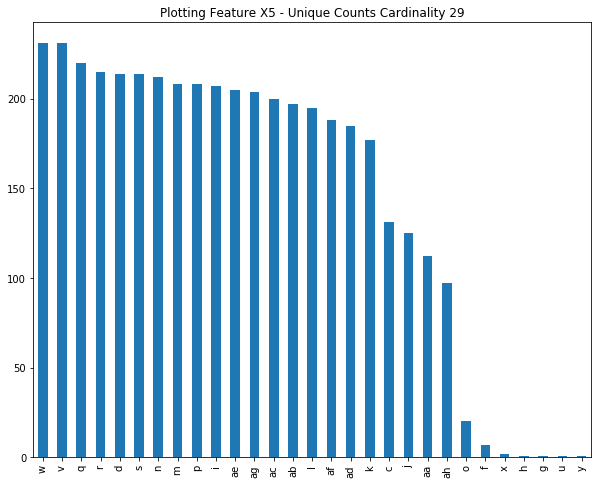

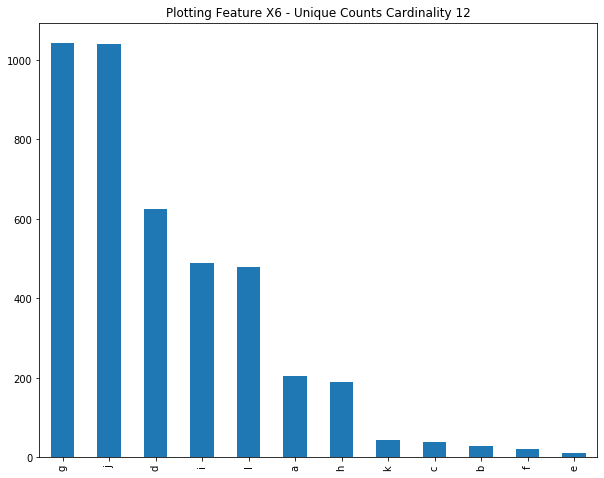

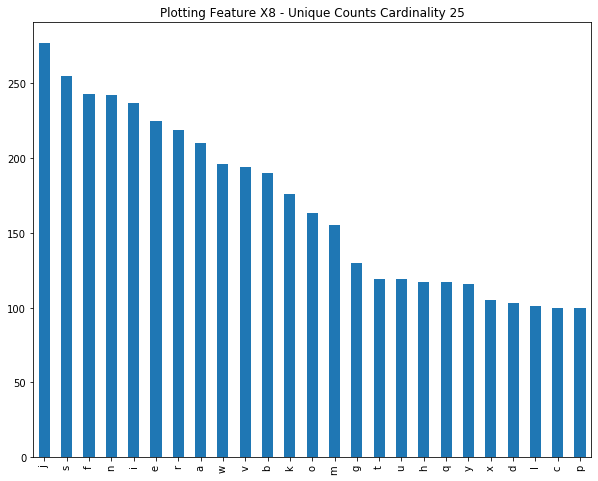

In [19]:
# Plotting the categorical values for cardinality
for c  in counts[2]:
    value_counts=train_df[c].value_counts()
    plt.figure(figsize=(10,8))
    plt.xlabel=('Feature')
    plt.ylabel=('Occurence')
    plt.title('Plotting Feature {} - Unique Counts Cardinality {}'.format(c,len(np.unique(train_df[c]))))
    train_df[c].value_counts().plot(kind='bar')
    plt.show()


 Check Mean values for the numerical features:

In [20]:
for c  in counts[1]:
    value_counts=train_df[c].value_counts()
    plt.figure(figsize=(10,8))
    plt.xlabel=('Feature')
    plt.ylabel=('Occurence')

C:\Users\Anitha\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [21]:
# sorted order of binary means
binary_means = [np.mean(train_df[c]) for c in counts[1]]
binary_means =np.array(counts[1]) [np.argsort(binary_means)]
binary_means

array(['X257', 'X296', 'X295', 'X288', 'X33', 'X280', 'X270', 'X260',
       'X259', 'X42', 'X95', 'X39', 'X339', 'X210', 'X207', 'X204',
       'X190', 'X319', 'X372', 'X236', 'X124', 'X278', 'X15', 'X384',
       'X369', 'X269', 'X318', 'X89', 'X252', 'X245', 'X59', 'X332',
       'X153', 'X40', 'X167', 'X110', 'X87', 'X92', 'X357', 'X83', 'X366',
       'X160', 'X385', 'X277', 'X266', 'X262', 'X86', 'X60', 'X253',
       'X248', 'X184', 'X145', 'X91', 'X383', 'X104', 'X67', 'X213',
       'X24', 'X307', 'X65', 'X353', 'X271', 'X105', 'X192', 'X258',
       'X21', 'X123', 'X281', 'X310', 'X16', 'X112', 'X365', 'X199',
       'X240', 'X364', 'X227', 'X125', 'X335', 'X282', 'X183', 'X312',
       'X97', 'X299', 'X30', 'X298', 'X36', 'X165', 'X26', 'X254', 'X230',
       'X55', 'X212', 'X34', 'X78', 'X325', 'X62', 'X172', 'X216', 'X169',
       'X370', 'X200', 'X237', 'X338', 'X214', 'X53', 'X239', 'X102',
       'X122', 'X320', 'X243', 'X88', 'X309', 'X90', 'X242', 'X217',
       'X94'

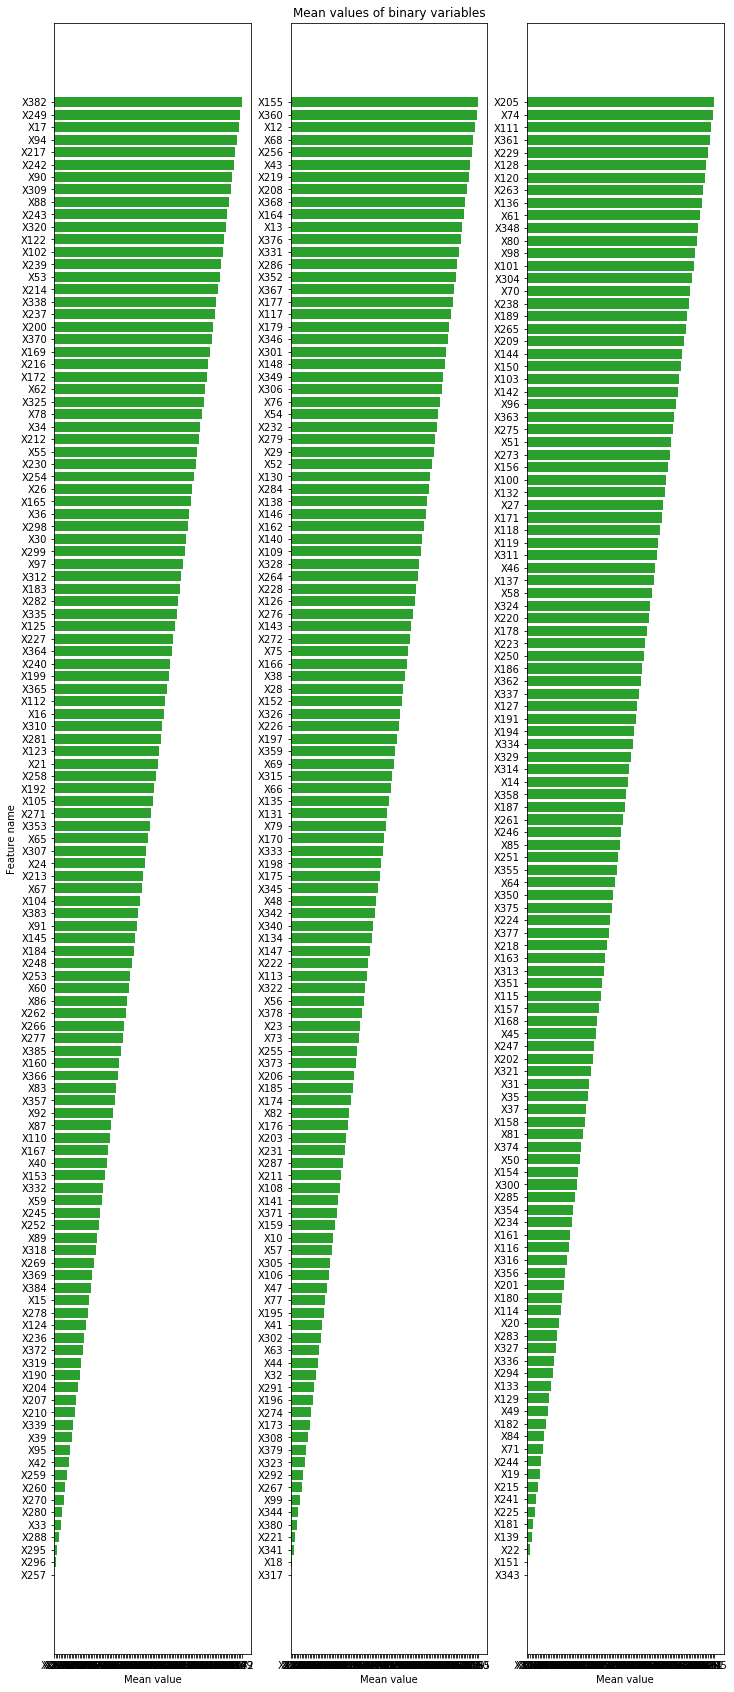

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(12,30))
ax[0].set_ylabel('Feature name')
ax[1].set_title('Mean values of binary variables')
for i in range(3):
    names, means = binary_means[i*119:(i+1)*119], binary_means[i*119:(i+1)*119]
    ax[i].barh(range(len(means)), means, color=pal[2])
    ax[i].set_xlabel('Mean value')
    ax[i].set_yticks(range(len(means)))
    ax[i].set_yticklabels(names, rotation='horizontal')
plt.show()

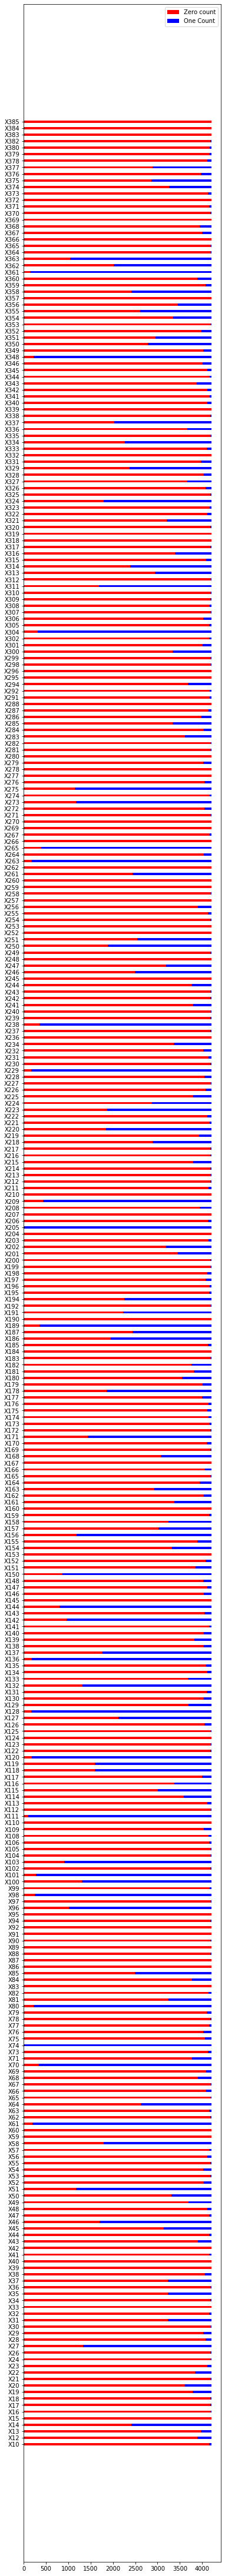

In [23]:
# Analysing the Counts for the Binary Features
zero_count_list = []
one_count_list = []
for col in counts[1]:
    zero_count_list.append((train_df[col]==0).sum())
    one_count_list.append((train_df[col]==1).sum())
N = len(counts[1])
ind = np.arange(N)
width = 0.35

plt.figure(figsize=(6,80))
p1 = plt.barh(ind, zero_count_list, width, color='red')
p2 = plt.barh(ind, one_count_list, width, left=zero_count_list, color="blue")
plt.yticks(ind, counts[1])
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.show()

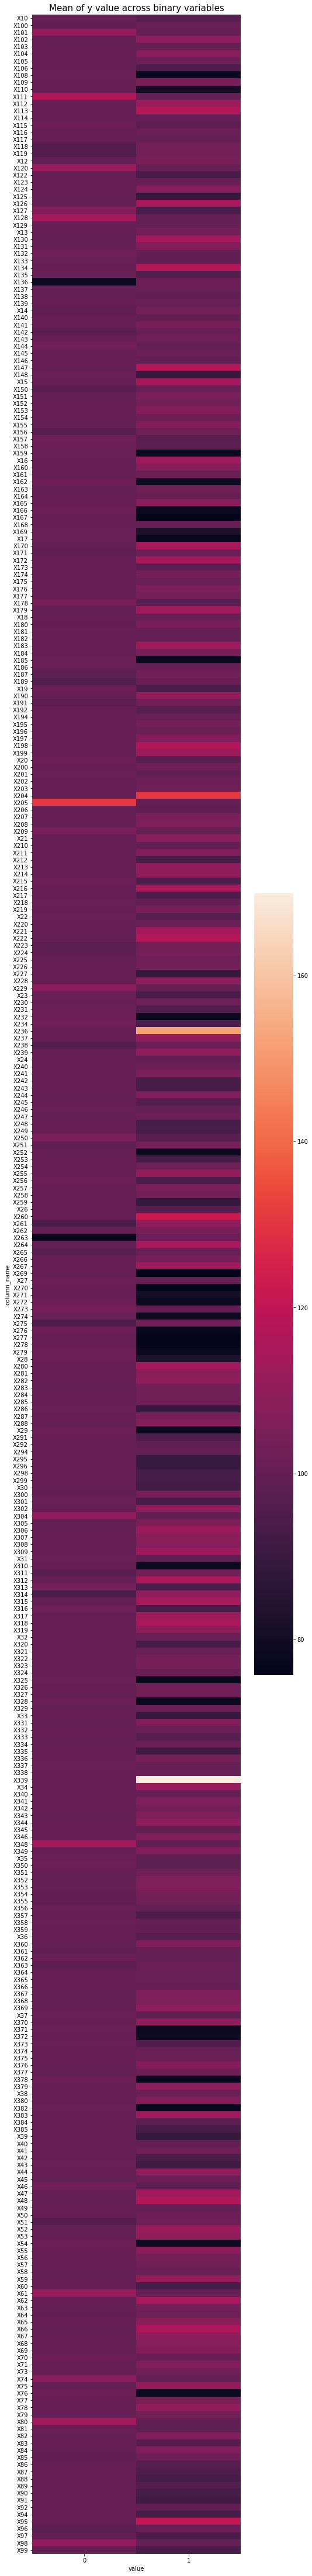

In [24]:
# Analysing the Mean for the Binary Features
zero_mean_list = []
one_mean_list = []
cols_list = counts[1]
for col in cols_list:
    zero_mean_list.append(train_df.loc[train_df[col]==0].y.mean())
    one_mean_list.append(train_df.loc[train_df[col]==1].y.mean())

new_df = pd.DataFrame({"column_name":cols_list+cols_list, "value":[0]*len(cols_list) + [1]*len(cols_list), "y_mean":zero_mean_list+one_mean_list})
new_df = new_df.pivot('column_name', 'value', 'y_mean')

plt.figure(figsize=(8,80))
sns.heatmap(new_df)
plt.title("Mean of y value across binary variables", fontsize=15)
plt.show()

In [25]:
# Applying Label encoding for the categorical variables in both train and test datasets
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in counts[2]:
    train_df[col] = le.fit_transform(train_df[col])
for col in counts_test[2]:
    test_df[col] = le.fit_transform(test_df[col])

In [26]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


In [27]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0


In [28]:
# Splitting the features and target variables
features = list(train_df.columns[2:])
x_train = train_df[features]
y_train = train_df['y']

x_test = test_df[features]
id_test = test_df['ID'].values



In [29]:
# Column with only one value is useless so we drop it
for column in features:
    cardinality = len(np.unique(x_train[column]))
    if cardinality == 1:
        x_train.drop(column, axis=1) 
        x_test.drop(column, axis=1)


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA



In [31]:
# Applying PCA for dimentionality reduction.
x_train_pca = x_train.iloc[:,1:]
pcaModel_num=PCA(n_components=120)
pcaModel_num.fit(x_train_pca)

PCA(copy=True, iterated_power='auto', n_components=120, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [32]:
x_train_pca=pd.DataFrame(pcaModel_num.transform(x_train_pca))
x_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,1.520875,15.244979,-4.005009,1.897001,-2.739202,3.872858,1.479136,0.810051,0.566324,1.697014,...,-0.083891,-0.308779,-0.073870,-0.553765,-0.639567,0.160790,0.295408,-0.451617,-0.008955,-0.098280
1,2.919427,15.314482,-8.534078,1.961876,-4.488516,-0.724238,1.139467,0.565187,-1.128424,0.189658,...,-0.089057,0.345441,0.266524,0.093831,0.045276,-0.046794,0.058708,-0.115253,0.099376,-0.127540
2,17.647875,15.861456,-7.790379,12.077624,-2.136452,0.797563,1.118201,1.071852,1.713209,-0.943789,...,0.444405,-0.424969,0.126342,0.021695,-0.015040,0.557627,0.050198,-0.521879,-0.120813,-0.471662
3,18.554351,12.513152,-8.964704,-6.783172,-4.272594,-2.241819,1.741137,0.437720,1.842676,-1.518548,...,0.049803,-0.140717,-0.073824,0.040821,0.116140,0.622080,-0.644665,0.056790,-0.017340,-0.042441
4,18.402237,7.775491,5.169437,2.468424,3.773591,-1.945942,1.854003,-0.690578,2.086612,-1.627811,...,-0.146950,0.009315,-0.007603,-0.200954,0.046499,0.083417,-0.059346,-0.248659,-0.130644,0.035145


In [33]:
pcaModel_num.explained_variance_ratio_.cumsum()*100

array([35.29414213, 57.00508509, 76.28685146, 90.5899942 , 93.05619767,
       94.2120969 , 94.92173126, 95.38029869, 95.79531131, 96.16895567,
       96.48943947, 96.7501509 , 96.98814707, 97.18765702, 97.35675226,
       97.51377021, 97.65371388, 97.77620122, 97.88624418, 97.98768901,
       98.08628197, 98.17806387, 98.2575605 , 98.33275723, 98.40007493,
       98.46453974, 98.52323851, 98.58134441, 98.63655772, 98.68899929,
       98.73774501, 98.78445335, 98.82854131, 98.87110076, 98.90977073,
       98.9441582 , 98.9777639 , 99.00996797, 99.04059683, 99.06978637,
       99.09757182, 99.12487708, 99.15195556, 99.17843226, 99.20215255,
       99.22531451, 99.24759272, 99.26958169, 99.29102466, 99.3117069 ,
       99.33183381, 99.35145659, 99.36999842, 99.3878774 , 99.40470806,
       99.42129173, 99.43731486, 99.4530248 , 99.46832487, 99.48281556,
       99.49694132, 99.51041444, 99.52379137, 99.53620235, 99.54831992,
       99.5601362 , 99.57177334, 99.58278144, 99.59351712, 99.60

In [34]:
pcaModel_num.components_

array([[ 1.67784836e-01,  9.80364638e-01, -1.04865317e-02, ...,
        -9.21492529e-05, -1.51125188e-06, -2.13982620e-05],
       [ 8.61938856e-01, -1.35079891e-01,  4.10735910e-02, ...,
        -1.14553112e-04,  4.75240713e-05,  1.10005676e-04],
       [ 4.58099407e-01, -9.78671679e-02,  2.77039167e-02, ...,
        -2.88485785e-05,  6.69263983e-06, -1.09084263e-04],
       ...,
       [ 1.69086375e-03, -3.93307592e-04, -1.19527403e-03, ...,
         2.67562916e-02,  2.31046921e-03,  3.36243741e-02],
       [-4.58162427e-03,  1.58610797e-03, -8.41086745e-04, ...,
        -8.06528071e-03,  1.02336034e-02, -2.61612429e-02],
       [ 3.93536340e-03,  4.39698713e-03,  4.90957288e-04, ...,
         1.21431876e-02, -1.25103452e-02,  2.99249924e-02]])

In [35]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_pca, y_train, test_size=0.2, random_state=20)

In [36]:
### Applying xgboost

from xgboost import XGBRegressor,plot_importance

In [37]:
xgbModel=XGBRegressor(max_depth=3, min_child_weight=4, reg_lambda=1000, gamma = 100) # lamba value

In [38]:
xgbModel.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=100, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1000, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
xgbModel.score(x_train,y_train)

0.6296862253517113

In [40]:
xgbModel.score(x_valid,y_valid)

0.5372606967227513

In [41]:
x_test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [42]:
pcaModel_test=PCA(n_components=120)
pcaModel_test.fit(x_test)

PCA(copy=True, iterated_power='auto', n_components=120, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [43]:
x_test_pca=pd.DataFrame(pcaModel_test.transform(x_test))
x_test_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,14.583362,14.166725,13.538576,2.408358,11.319422,6.942207,-2.026131,2.533691,-1.082227,0.549642,...,0.104397,-0.265975,-0.287909,-0.014833,-0.123354,0.076878,-0.051221,0.198894,0.127568,0.333653
1,-15.251613,-7.736756,-7.454951,-2.662034,11.593793,1.159404,4.006845,1.839727,0.600356,0.352257,...,0.009382,-0.154564,-0.119557,-0.087210,-0.028366,0.020150,-0.052274,0.163932,0.112039,0.046387
2,11.856465,-1.680173,-9.989615,14.918866,-1.088862,-2.691304,-0.904760,0.736427,-0.079929,0.635872,...,0.183819,-0.123378,-0.013934,0.194063,0.290774,-0.092806,-0.123039,-0.053756,-0.241720,-0.046093
3,12.606882,13.871583,14.143968,-8.224169,1.683164,-3.704103,-2.549437,2.039042,0.292193,0.400579,...,0.080442,-0.126115,-0.265131,0.178734,-0.284718,0.137069,-0.150833,0.519355,0.456532,0.412477
4,-11.897597,2.735944,18.424166,5.053374,0.359332,-1.415910,0.831164,-3.044071,1.359953,-0.424765,...,0.041657,0.019650,0.049202,0.040796,-0.084648,-0.015109,0.121938,-0.052517,0.063428,0.210964


In [44]:
## Xgboost regressor for preducting 
merc_test_pred=pd.DataFrame(xgbModel.predict(x_test_pca),columns=['y'])

In [45]:
merc_test_pred['ID']=test_df.ID

In [46]:
merc_test_pred.tail(10)

,y,ID
4199,90.890335,8401
4200,97.561600,8404
4201,105.033508,8407
4202,93.812935,8408
4203,113.013458,8409
4204,99.404427,8410
4205,101.385239,8411
4206,89.747910,8413
4207,92.940201,8414
4208,108.971359,8416


In [47]:
#exporting predictions to CSV
merc_test_pred.to_csv('Mercedes_TestData_Predictions.csv',index=False)